In [400]:
import pandas as pd
import warnings
warnings.simplefilter('ignore')

df = pd.read_csv('./preprocessed_kb_0518.csv', encoding='ansi')
df = df[['price','year','use','depreciation','mileage', 'car_cc']]
df.head()

,price,year,use,depreciation,mileage,car_cc
0,849,2013,103,60,131493,0
1,1450,2018,52,27,60000,1598
2,655,2017,57,54,133319,0
3,999,2017,48,21,90000,1399
4,580,2011,131,83,159474,0


In [401]:
df.corr().round(2)

,price,year,use,depreciation,mileage,car_cc
price,1.00,0.51,-0.53,-0.55,-0.38,0.12
year,0.51,1.00,-0.99,-0.86,-0.61,0.02
use,-0.53,-0.99,1.00,0.87,0.61,-0.02
depreciation,-0.55,-0.86,0.87,1.00,0.72,-0.00
mileage,-0.38,-0.61,0.61,0.72,1.00,0.03
car_cc,0.12,0.02,-0.02,-0.00,0.03,1.00


In [402]:
from scipy.stats import pearsonr

df.corr(method='pearson').round(2)

,price,year,use,depreciation,mileage,car_cc
price,1.00,0.51,-0.53,-0.55,-0.38,0.12
year,0.51,1.00,-0.99,-0.86,-0.61,0.02
use,-0.53,-0.99,1.00,0.87,0.61,-0.02
depreciation,-0.55,-0.86,0.87,1.00,0.72,-0.00
mileage,-0.38,-0.61,0.61,0.72,1.00,0.03
car_cc,0.12,0.02,-0.02,-0.00,0.03,1.00


In [403]:
from scipy.stats import spearmanr

df.corr(method='spearman').round(2)

,price,year,use,depreciation,mileage,car_cc
price,1.00,0.69,-0.70,-0.68,-0.50,0.19
year,0.69,1.00,-0.99,-0.90,-0.68,0.05
use,-0.70,-0.99,1.00,0.91,0.69,-0.05
depreciation,-0.68,-0.90,0.91,1.00,0.79,-0.02
mileage,-0.50,-0.68,0.69,0.79,1.00,0.01
car_cc,0.19,0.05,-0.05,-0.02,0.01,1.00


In [404]:
from scipy.stats import kendalltau

df.corr(method='kendall').round(2)

,price,year,use,depreciation,mileage,car_cc
price,1.00,0.52,-0.51,-0.50,-0.35,0.14
year,0.52,1.00,-0.95,-0.76,-0.52,0.04
use,-0.51,-0.95,1.00,0.74,0.51,-0.04
depreciation,-0.50,-0.76,0.74,1.00,0.60,-0.01
mileage,-0.35,-0.52,0.51,0.60,1.00,0.00
car_cc,0.14,0.04,-0.04,-0.01,0.00,1.00


In [405]:
from sklearn.model_selection import train_test_split

x = df[['year', 'use', 'depreciation', 'mileage']]

y = df.price

X_test, X_train, y_test, y_train = train_test_split(x, y, train_size=0.7, test_size=0.3)

In [406]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(X_train, y_train)
mlr_pred = mlr.predict(X_test)

In [407]:
test = [[2011, 134, 90, 198485]]
mlr.predict(test)

array([306.07538613])

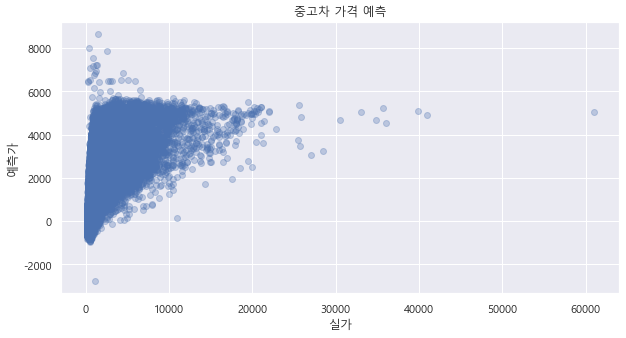

In [408]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(y_test, mlr_pred, alpha=0.3)
plt.xlabel("실가")
plt.ylabel("예측가")
plt.title("중고차 가격 예측")
plt.show()

In [446]:
print(mlr.score(X_train, y_train))
print(mlr.score(X_test, y_test))

0.286691068250314
0.3120868313052052


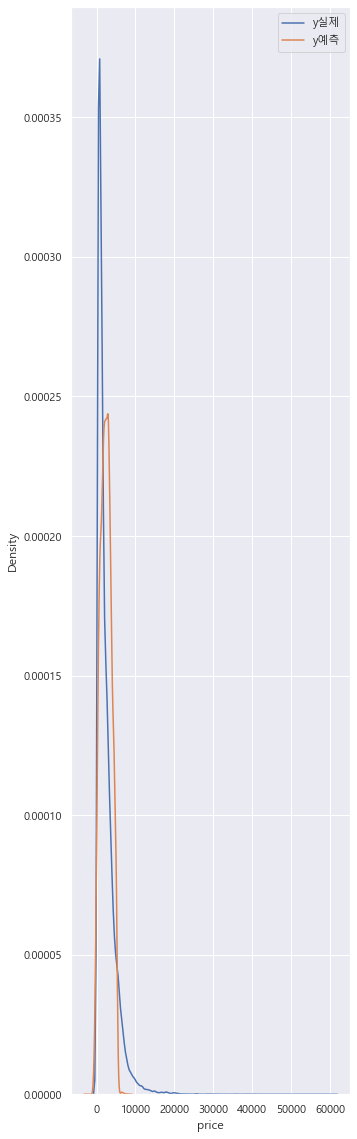

In [410]:
import seaborn as sns
from matplotlib import rcParams

sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False,
        'figure.figsize':(5,20)},
        style='darkgrid')
ax1 = sns.distplot(y, hist = False, label = 'y실제')
ax2 = sns.distplot(mlr_pred, hist = False, label = 'y예측')
plt.legend()
plt.show()

In [411]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

folmula = "price ~ " + "+".join(df.columns[1:5])
y, X = dmatrices(folmula, data = df, return_type='dataframe')

In [412]:
df_vif = pd.DataFrame()
df_vif["colname"] = X.columns
df_vif["VIF"] = [vif(X.values, i).round(1) for i in range(len(X.columns))]
df_vif

,colname,VIF
0,Intercept,17806136.8
1,year,57.4
2,use,61.1
3,depreciation,5.4
4,mileage,2.1


In [413]:
df_sub = pd.concat([df.loc[:, "price":"year"],
df.loc[:, "depreciation":"mileage"]],
axis=1)
df_sub

,price,year,depreciation,mileage
0,849,2013,60,131493
1,1450,2018,27,60000
2,655,2017,54,133319
3,999,2017,21,90000
4,580,2011,83,159474
...,...,...,...,...
44241,290,2006,93,143900
44242,400,2007,94,188310
44243,630,2010,83,144233
44244,990,2012,78,136212


In [414]:
folmula = "price ~ " + "+".join(df_sub.columns[1:])
y, X = dmatrices(folmula, data = df_sub, return_type='dataframe')
df_vif = pd.DataFrame()
df_vif["colname"] = X.columns
df_vif["VIF"] = [vif(X.values, i).round(1) for i in range(X.shape[1])]
df_vif

,colname,VIF
0,Intercept,1228401.7
1,year,4.0
2,depreciation,5.1
3,mileage,2.1


In [415]:
from statsmodels.formula.api import ols

folmula = "price ~ " + "+".join(df_sub.columns[1:])

model = ols(folmula, data = df_sub).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     6442.
Date:                Mon, 23 May 2022   Prob (F-statistic):               0.00
Time:                        16:18:16   Log-Likelihood:            -4.0031e+05
No. Observations:               44246   AIC:                         8.006e+05
Df Residuals:                   44242   BIC:                         8.007e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.965e+05   1.08e+04    -18.141      0.000   -2.18e+05   -1.75e+05
year            99.8580      5.357     18.641      0.000      89.358     110.358
depreciation   -45.0241      0.927    -48.562      0.000     -46.841     -43.207
mileage          0.0010      0.000      4.333      0.000       0.001       0.001
==============================================================================
Omnibus:                    39950.054   Durbin-Watson:                   1.683
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3466170.878
Skew:                           4.019   Prob(JB):                         0.00
Kurtosis:                      45.609   Cond. No.                     1.27e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [416]:
df_test = df.iloc[[0],[0]]
df_test['year'] = 2011
df_test['depreciation'] = 90
df_test['mileage'] = 198485

df_test

,price,year,depreciation,mileage
0,849,2011,90,198485


In [417]:
model.predict(df_test)

0    441.818866
dtype: float64

In [418]:
ols_pred = model.predict(X_test)
model.rsquared

0.3040097483170444

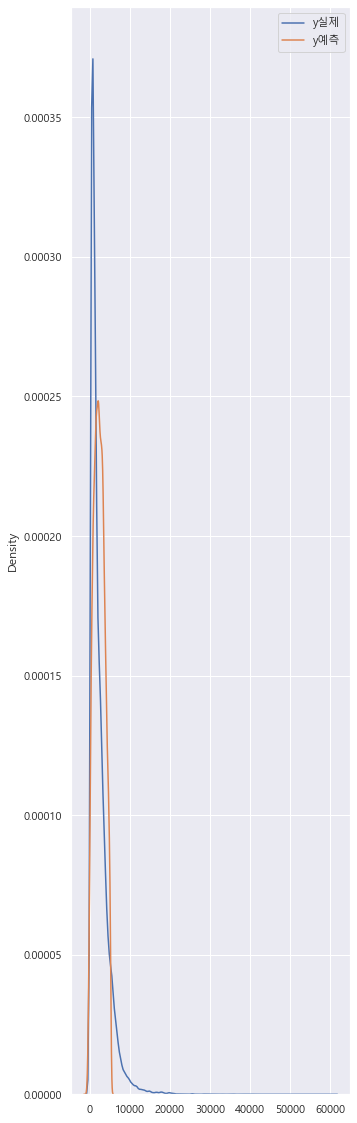

In [419]:
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False,
        'figure.figsize':(5,20)},
        style='darkgrid')
ax1 = sns.distplot(y, hist = False, label = 'y실제')
ax2 = sns.distplot(ols_pred, hist = False, label = 'y예측')
plt.legend()
plt.show()

In [420]:
x = df[['year', 'depreciation', 'mileage']]

y = df.price

X_test, X_train, y_test, y_train = train_test_split(x, y, train_size=0.7, test_size=0.3)

mlr = LinearRegression()
mlr.fit(X_train, y_train)
mlr_pred = mlr.predict(X_test)

test = [[2011, 90, 198485]]
mlr.predict(test)

array([405.63756477])

In [421]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

model_ridge = make_pipeline(StandardScaler(),Ridge())
model_ridge.fit(X_train,y_train)
print(model_ridge.score(X_train,y_train))
print(model_ridge.score(X_test,y_test))
print(model_ridge.predict(test))

0.2866910645099817
0.3120872088290052
[405.71753668]


In [422]:
param_value = {'alpha':[0.0001,0.01,1,2,3,4]}
modelRidge = Ridge()
gridSearch_ridge = GridSearchCV(modelRidge,param_grid = param_value,cv=10)
gridSearch_ridge.fit(X_train,y_train)

print(gridSearch_ridge.best_params_)
print(gridSearch_ridge.best_score_)


{'alpha': 4}
0.2942764903203678


In [423]:
modelRidge = Ridge(alpha=4)
modelRidge.fit(X_train,y_train)

print(modelRidge.score(X_train,y_train))
print(modelRidge.score(X_test,y_test))
print(modelRidge.predict(test))

0.2866910682175764
0.31208673553995336
[405.63352964]


In [436]:
model_lasso = Lasso()
model_lasso.fit(X_train,y_train)
print(model_lasso.score(X_train,y_train))
print(model_lasso.score(X_test,y_test))
print(model_lasso.predict(test))

0.28669103631807835
0.3120837643809389
[405.52856302]


In [425]:
modelLasso = Lasso()
gridSearch_lasso = GridSearchCV(modelLasso,param_grid = param_value,cv=10)
gridSearch_lasso.fit(X_train,y_train)

print(gridSearch_lasso.best_params_)
print(gridSearch_lasso.best_score_)

{'alpha': 0.0001}
0.2942764797139802


In [437]:
modelLasso = Lasso(alpha=0.0001)
modelLasso.fit(X_train,y_train)

print(modelLasso.score(X_train,y_train))
print(modelLasso.score(X_test,y_test))
print(modelLasso.predict(test))

0.28669106825031365
0.3120868310070454
[405.6375541]


In [441]:
model_elastic = ElasticNet(l1_ratio=0.5)
model_elastic.fit(X_train,y_train)
print(model_elastic.score(X_train,y_train))
print(model_elastic.score(X_test,y_test))
print(model_elastic.predict(test))

0.28662261395188526
0.31186756261973436
[399.92275799]


In [443]:
param_value = {'elasticnet__alpha':[0.0001,0.01,1,2,3,4]}
modelElastic = make_pipeline(StandardScaler(),ElasticNet())
gridSearch_elastic = GridSearchCV(modelElastic,param_grid = param_value,cv=10)
gridSearch_elastic.fit(X_train,y_train)

print(gridSearch_elastic.best_params_)
print(gridSearch_elastic.best_score_)

{'elasticnet__alpha': 0.0001}
0.2942765701741757


In [444]:
modelElastic = make_pipeline(StandardScaler(),ElasticNet(alpha=0.0001))
modelElastic.fit(X_train,y_train)

print(modelElastic.score(X_train,y_train))
print(modelElastic.score(X_test,y_test))
print(modelElastic.predict(test))

0.286691066598168
0.3120870824097395
[405.69063348]


In [430]:
from sklearn.preprocessing import PolynomialFeatures

model = make_pipeline(PolynomialFeatures(degree=2),StandardScaler(),
                      LinearRegression())
model.fit(X_train,y_train)

print(model.score(X_train,y_train))
print(model.score(X_test,y_test))
print(model.predict(test))

0.29860110860637123
0.32279302371123053
[717.16634001]


In [445]:
from sklearn.neural_network import MLPRegressor

modelML = MLPRegressor(hidden_layer_sizes=[500,4],max_iter=5000,alpha=0.005,verbose=1)
modelML.fit(X_train,y_train)
modelML.score(X_test,y_test)
modelML.predict(test)

Iteration 1, loss = 6164118.35417406
Iteration 2, loss = 6125176.54197149
Iteration 3, loss = 6125017.15098916
Iteration 4, loss = 6124857.64424611
Iteration 5, loss = 6124698.13407254
Iteration 6, loss = 6124538.59761522
Iteration 7, loss = 6124378.82482252
Iteration 8, loss = 6124219.26939218
Iteration 9, loss = 6124059.42637888
Iteration 10, loss = 6123899.55980424
Iteration 11, loss = 6123739.85808588
Iteration 12, loss = 6123579.72294710
Iteration 13, loss = 6123420.17087273
Iteration 14, loss = 6123260.54186732
Iteration 15, loss = 6123100.85936550
Iteration 16, loss = 6122941.11302879
Iteration 17, loss = 6122781.54395558
Iteration 18, loss = 6122621.33130752
Iteration 19, loss = 6122461.45075969
Iteration 20, loss = 6122301.70878689
Iteration 21, loss = 6122142.03904965
Iteration 22, loss = 6121982.40537006
Iteration 23, loss = 6121822.52192876
Iteration 24, loss = 6121662.97608210
Iteration 25, loss = 6121503.46204858
Iteration 26, loss = 6121343.54026714
Iteration 27, loss = 

array([1052.98890811])

In [432]:
modelML = MLPRegressor(hidden_layer_sizes=[1000,4],max_iter=5000,alpha=0.005,
                       verbose=1,random_state=1)
modelML.fit(X_train,y_train)
modelML.score(X_test,y_test)
modelML.predict(test)

Iteration 1, loss = 4127380.89233292
Iteration 2, loss = 2803023.77600249
Iteration 3, loss = 2733729.77694079
Iteration 4, loss = 2749511.18880139
Iteration 5, loss = 2681084.87336140
Iteration 6, loss = 2660936.99686787
Iteration 7, loss = 2651651.25870296
Iteration 8, loss = 2651818.26182192
Iteration 9, loss = 2638510.78682609
Iteration 10, loss = 2610832.53852779
Iteration 11, loss = 2608819.61484721
Iteration 12, loss = 2609641.10688313
Iteration 13, loss = 2621512.15432752
Iteration 14, loss = 2576090.44313871
Iteration 15, loss = 2577792.68322437
Iteration 16, loss = 2604326.47476337
Iteration 17, loss = 2667399.26931008
Iteration 18, loss = 2581024.01867516
Iteration 19, loss = 2594427.08199903
Iteration 20, loss = 2548690.03811139
Iteration 21, loss = 2552472.70177111
Iteration 22, loss = 2540723.26502209
Iteration 23, loss = 2564112.63979100
Iteration 24, loss = 2522201.52584767
Iteration 25, loss = 2531591.73850712
Iteration 26, loss = 2523901.57999498
Iteration 27, loss = 

array([-0.34558724])

In [433]:
from sklearn.metrics import r2_score

models = [
    LinearRegression(), 
    MLPRegressor(hidden_layer_sizes=[512, 4], alpha=0.005, random_state=42),
    MLPRegressor(hidden_layer_sizes=[48, 4], max_iter=5000, alpha=0.005, random_state=42), 
    MLPRegressor(hidden_layer_sizes=[512, 4], max_iter=5000, alpha=0.005, random_state=42), 
    MLPRegressor(hidden_layer_sizes=[1024, 4], max_iter=5000, alpha=0.005, random_state=42),
    MLPRegressor(hidden_layer_sizes=[1024, 512, 4], max_iter=5000, alpha=0.005, random_state=42),
]

for m in models:
    m.fit(X_train, y_train)
    print(m.__class__)
    print(r2_score(y_train, m.predict(X_train)))
    print(r2_score(y_test, m.predict(X_test)))  

<class 'sklearn.linear_model._base.LinearRegression'>
0.286691068250314
0.3120868313052052
<class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'>
0.27849532786136544
0.29816967407995143
<class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'>
0.2736086066317558
0.29351353285727644
<class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'>
0.27849532786136544
0.29816967407995143
<class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'>
0.2728139313139729
0.2891692861713532
<class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'>
0.24913491720120662
0.2590547623587107
